# Chapter 3: Undirected graphs

*Selected Topics in Mathematical Optimization*

*2016-2017*

**Bernard De Baets**

**Michiel Stock**

**Raúl Pérez-Fernández**

***Joke Ampe - 2nd master in Bio-informatics***

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.spatial import voronoi_plot_2d, Voronoi
import numpy as np
from timeit import Timer
import collections
from scipy.stats import linregress
from matplotlib.patches import Polygon
import matplotlib.path as mplPath
%matplotlib inline

## Some essential data structures in python

Using the correct datastructure is key to implementing an efficient graph algorithm. Below is a concise overview of some elementary python data structures.

For more information on the time complexity of operations on these data structures, see [this](https://wiki.python.org/moin/TimeComplexity) link.

### Lists: ordered  collection of objects

Lists store objects in sequential order. Adding and removing elements at the back is easy, inserting or removing elements elsewhere is computationally inefficient (memory has to be reshuffled).

In [56]:
my_list = [1, 2, 3, 4, 5]

In [57]:
my_list.append(6)  # add element at the back
my_list

[1, 2, 3, 4, 5, 6]

In [58]:
my_list.pop()  # return last element

6

In [59]:
my_list  # element is gone

[1, 2, 3, 4, 5]

In [60]:
my_list[4]  # take element

5

In [61]:
my_list[3] = 'three'  # replace
my_list

[1, 2, 3, 'three', 5]

In [62]:
# for loops in lists
squares = [x**2 for x in range(1, 11)]
squares

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]

In [63]:
# a more complex example
squares_odd = [x**2 for x in range(1, 11) if x%2==1]
squares_odd

[1, 9, 25, 49, 81]

### Sets: unordened collection of objects

Sets have no ordening and cannot contain duplicates. It is very efficient (constant time compelxity) to check if an element is present and to add or remove an object.

In [64]:
numbers = set([1, 2, 15, -1, 4, 2, 3, 4])  # make set from list 
numbers  # no particular order or duplicates

{-1, 1, 2, 3, 4, 15}

In [65]:
5 in numbers  # check if element is member

False

In [66]:
numbers.add(5)  # add element

In [67]:
5 in numbers

True

In [68]:
# set operations on two sets
new_numbers = set([2, 15, -1, 8, 6, 15])
new_numbers

{-1, 2, 6, 8, 15}

In [69]:
numbers & new_numbers  # intersection (AND)

{-1, 2, 15}

In [70]:
numbers | new_numbers  # union (OR)

{-1, 1, 2, 3, 4, 5, 6, 8, 15}

In [71]:
numbers - new_numbers  # set difference (in first but not in second)

{1, 3, 4, 5}

## Dictorinary: key-value storage

Dictionaries are the best of both lists and sets, they store values by a key

In [72]:
my_dict = {'A' : 1, 'B' : 'bee', 'C' : [1, 2, 3]}  # make dictionary

In [73]:
my_dict['B']  # get value associated by key

'bee'

In [74]:
my_dict['D'] = 'new value'  # add new key-value
my_dict

{'A': 1, 'B': 'bee', 'C': [1, 2, 3], 'D': 'new value'}

In [75]:
'A' in my_dict  # check if dict has key

True

In [76]:
for k, v in my_dict.items():  # iterate over values
    print(k, v)

C [1, 2, 3]
D new value
B bee
A 1


In [77]:
for k in my_dict.keys():  # iterate over keys
    print(k)

C
D
B
A


In [78]:
for v in my_dict.values():  # iterate over values
    print(v)

[1, 2, 3]
new value
bee
1


## Representing graphs in python

Consider the following example graph:

Typically, graphs are represented as:
- **list of edges**: a set of edges (tuples of vertices) we use sets are there is no order in the edges. THis is the prefered format to *store* graphs.
- **adjacency lists**: in python implemented as dictionaries. Each vertex is a key and the associated value is a set of neighboring edges (for undirected graphs every outgoing edge should be balanced by an ingoing edge).
- **adjacenty matrices**: matrix of which the elements store the edges. Is only used for dense graphs.

Example of the theory:

![](Figures/undir_graph.png)

In [25]:
edges = set([('A', 'B'), ('B', 'C'), ('C', 'D'), ('A', 'D'), ('C', 'E'), ('D', 'E')])

In [26]:
from graphs import edges_to_adj_list

In [27]:
adj_list = edges_to_adj_list(edges)
adj_list

{'A': {'B', 'D'},
 'B': {'A', 'C'},
 'C': {'B', 'D', 'E'},
 'D': {'A', 'C', 'E'},
 'E': {'C', 'D'}}

Some basic graph algorithms are implemented:
- `give_connected_component`: gives the largest connected component for a vertex
- `is_connected`: checks if a graph is connected (every edge can be reached from every other edge)
- `has_path`: checks if there exists a path between two vertices
- `is_bridge`: checks if an edge is a bridge (i.e. removing it makes the graph disconnected

Run the examples and check the result

In [28]:
from graphs import give_connected_component, is_connected, is_bridge, has_path, adj_list_to_edges

In [79]:
# example1 has one added edge to make it have a Eulerian path (as drawn on the blackboard during the lecture)
example1_edges = set([('A', 'B'), ('A', 'C'), ('B', 'C'), ('D', 'C'), ('D', 'E'),
                     ('E', 'F'), ('F', 'G'), ('G', 'E'), ('D', 'F'), ('F', 'C')
                     ])
example2_edges = set([('A', 'B'), ('A', 'C'), ('B', 'C'), ('D', 'E'),
                     ('D', 'G'), ('F', 'G'), ('G', 'E'), ('D', 'F')
                     ])

In [30]:
example1_adj_list = edges_to_adj_list(example1_edges)
example2_adj_list = edges_to_adj_list(example2_edges)

In [31]:
give_connected_component(example1_adj_list, 'A')

{'A', 'B', 'C', 'D', 'E', 'F', 'G'}

In [32]:
give_connected_component(example2_adj_list, 'A')

{'A', 'B', 'C'}

In [33]:
is_connected(example1_adj_list)

True

In [34]:
is_connected(example2_adj_list)

False

In [35]:
is_bridge(example1_adj_list, ('A', 'B'))

False

In [36]:
is_bridge(example1_adj_list, ('C', 'D'))

False

In [37]:
print(adj_list_to_edges(example1_adj_list))

{('B', 'A'), ('E', 'F'), ('C', 'A'), ('E', 'G'), ('C', 'F'), ('G', 'F'), ('D', 'F'), ('C', 'B'), ('D', 'C'), ('F', 'D'), ('G', 'E'), ('F', 'G'), ('B', 'C'), ('F', 'E'), ('E', 'D'), ('F', 'C'), ('C', 'D'), ('A', 'B'), ('A', 'C'), ('D', 'E')}


In [38]:
has_path(example2_adj_list, 'A', 'C')

True

In [39]:
has_path(example2_adj_list, 'A', 'F')

False

## Fleury's algorithm

Fleury's algorithm is a simple (though inefficient algorithm to find an Eulerian trail (i.e. a walk on the graph that passes all the edges).

It can be shown that a graph has an Eulerian trail if and only if it is connected and it it has exactly zero or two edges with an odd degree.

Fleury's algorithm is executed as follows:
1. Start at a vertex of odd degree, or, if the graph has none, start with an arbitrarily chosen vertex.
2. Chooses the next edge in the path to be one whose deletion would not disconnect the graph (i.e. is not a bridge), unless there is no such edge, in which case pick the remaining edge left at the current vertex.
3. Add the edge to the path and remove the edge from the graph.
4. Repeat steps 2-3 until no more edges are left.

**ASSIGNMENT 1**

1. Complete the pseudocode of fleury's algorithm. The algorithm first checks if an Eulerian path exists (and returns None if not) and returns the path as a list. Use the given function `is_bridge` to check if an 
2. Study the time complexity of the algorithm. For this you have 25 graphs at your disposal. These graphs are stored in json format in the form `eulerianxxx.json` with '`xxx`' the number of edges. The function `load_graph` can read this data file (see example). For each file, measure the time to find the Eulerian path and make a graph (in log-log scale) of the time vs. the number of edges. Comment on the relation (linear time complexity, super/sublinear?) Does this make sense? HINT: detecting if an edge is a bridge is done with an average time complexity linear in the number of edges.

In [40]:
def fleury_algorithm(adj_list):
    """
    Fleury's algorithm for finding an Eulerian path (if one exists)
    
    First it checks if the path exists, if it exists, it returns a list of
    the nodes that are visisted in an Eulerian path
    
    Inputs:
        - adj_list
        
    Outputs:
        - path
    """
    adj_list = {k : v.copy() for k, v in adj_list.items()}  # make a copy
    # makes sure that we destroy the copy of the graph and not the actual graph. 
    # important: if you want to remove a link, you have to it twice (symmetric graph)
    
    # Check first requirement to have a Eulerian path
    if is_connected(adj_list):
        odds = 0
        odd_node = None
        for node in adj_list:
            if len(adj_list[node])%2==1:
                odds +=1
                odd_node = node
        # Check second requirement        
        if odds == 0 or odds == 2:
            # the path exists, choose a starting node
            if odd_node == None:
                # If none of the nodes has odd degree, randomly take a starting node
                current = adj_list.pop()
            else:
                # If it had a node with odd degree, take that as a starting node (any of the odd nodes)
                current = odd_node
            
            edges = adj_list_to_edges(adj_list)
            path = []
            
            # As long as there are still edges, continue the algorithm
            while edges != set():
                if len(adj_list[current])>1:
                    for node in adj_list[current]:
                        # Check if it is a bridge, if it is not: take this edge as next step
                        if not is_bridge(adj_list, (current, node)):
                            nextnode = node
                            break
                # If only one edge is left starting from a certain node, take that edge
                else:
                    nextnode = list(adj_list[current])[0] 
                    
                # append the edge to the path and remove the edge from the graph    
                path.append(current)
                edges.remove((current, nextnode))
                edges.remove((nextnode, current))
                adj_list = edges_to_adj_list(edges)
                current = nextnode
            #append the final node    
            path.append(nextnode)
            return path
        else:
            return None
    else:
        return None

  
        

In [41]:
print(fleury_algorithm(example1_adj_list))

['D', 'C', 'B', 'A', 'C', 'F', 'G', 'E', 'F', 'D', 'E']


In [42]:
from graphs import load_graph

In [44]:
# files is a dictionary of dictionaries. 
# The 'outer' dictionary indicates the size as keys and the adjacency list (graphs) as value. 

all_n = [14, 26, 46, 74, 110, 154, 206, 266, 334, 410, 494, 586, 686, 794, 910, 1034, 1166, 1306, 1454, 1610, 1774, 1946, 2126, 2314, 2510]
files = {}
for i in all_n:
    graph = load_graph('Data_Eulerian/eulerian' + str(i) + '.json')
    files[i] = graph


In [45]:
# use this cell to measure the time to find the Eulerian path for each graph

times = {}
for n, graph in files.items():
    t = Timer(lambda: fleury_algorithm(graph))
    times[n] = t.timeit(number=10)
    
# sort based on the problem size
# sorted_times is an Ordered Dictionary

sorted_size = collections.OrderedDict(sorted(times.items()))



The estimated slope of the line is:  1.95375928452
The intercept is estimated to be:  -4.83216656384


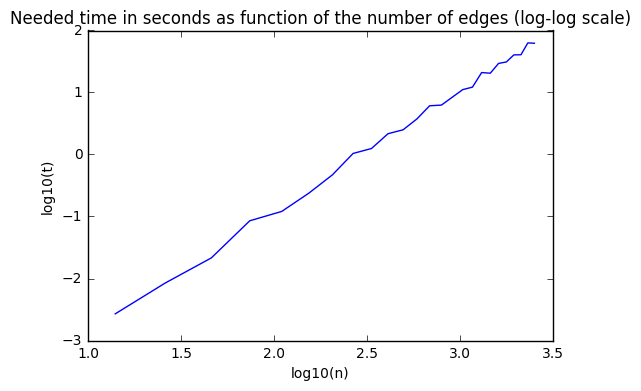

In [46]:
# use this cell to plot the time as a function of the number of edges (log-log scale)
sorted_t = []
sorted_n = []
for k, v in sorted_size.items():
    sorted_t.append(v)
    sorted_n.append(k)

log_n = np.log10(sorted_n)
log_t = np.log10(sorted_t)

regression = linregress(log_n, log_t)
slope = regression[0]
constant = regression[1]
print("The estimated slope of the line is: ",slope)
print("The intercept is estimated to be: ",constant)

plt.plot(log_n, log_t)
plt.title('Needed time in seconds as function of the number of edges (log-log scale)')
plt.xlabel('log10(n)')
plt.ylabel('log10(t)')

**Empirical time-complexity**

The time complexity is estimated to be in the form of $Cn^{a}$. C is a constant and a is the degree of the polynomial relation. 
This slope is calculated to be 1.93 in our example (when I ran it), which is close to 2. We can thus say that the problem is solved in polynomial time, with a degree of around 2. The reason that it is a bit less then 2 in this empirical example could maybe be attributed to the fact that in the algorithm sometimes a right edge is found before all iterations are finished. When all iterations have to be done, we have to check n bridges (each edge). Since detection of an edge being a bridge can be done in linear time, it means that checking 'bridge or not' for **each** edge takes $n^{2}$ equivalents of time (for all of the n edges it takes n time equivalents = $n*n = n^{2}$). But in our algorithm, we don't check exhaustively each edge. Instead, we add an edge from the moment we find that it is not a bridge. In that case we don't test the remaining edges starting from the same node, making the time complexity slightly less than $n^{2}$.

The intercept is around -5 in a log log plot. This means the C in the original equation is $10^{-5}$, which is very small.

However, what is of interest is how the required time increases with increasing problem size and this seems to be polynomial with a degree of 2. This makes sense because a large part of the algorithm is checking for bridges, which takes $n^{2}$ time.

## Graph coloring using six colors

Graph coloring is an optimization problem of assinging a color to each label using as few colors as possible such that no neighboring vertices have the same color.

The four color theorem states that a planar graph can be colored using only four colors.

We will use six colors (though we rarely need more than five) to color a planar graph. For this, the algorithm is very simple:

1. Color recursively with the six colors all vertices of degree five or more.
2. Color the rest of the graph with a free color.

**ASSIGNMENT 2**

1. Complete the graph coloring algorithm.
2. What do you think the time complexity of this algorithm is going to be (based on reasoning).

You can illustrate this algorithm on a Voronoi plot (a tesselation of a plane based on the distance to a set of points). Feel free to improve the graphics :-) 

--> I made you a picasso! (With some help of stackoverflow: http://stackoverflow.com/questions/20515554/colorize-voronoi-diagram)

In [47]:
def graph_color(adj_list, colors=['seagreen', 'darkorange', 'darkred', 'deepskyblue', 'darkblue', 'k']):
    """
    Provides one of six colors for each vertex in a planar graph
    such that no neighboring vertices have the same color
    
    Inputs:
        - adj_list: adjecency list of a planar graph
        - colors: list of six colors (default those for matplotlib plotting)
        
    Output:
        - vertices_colors: a dict with a color for each vertex
    """
    vertices_colors = {}
    
    # Find nodes with degree higher than five and color those nodes
    high_d = []
    for k, v in adj_list.items():
        if len(v) >= 5:
            high_d.append(k)
    
    for i in high_d:
        av_col = colors.copy()
        for j in adj_list[i]:
            if j in vertices_colors:
                if vertices_colors[j] in av_col:
                    av_col.remove(vertices_colors[j])
        
    # Color other nodes
    for i in adj_list:
        if i not in vertices_colors:
            av_col = colors.copy()
            for j in adj_list[i]:
                if j in vertices_colors:
                    if vertices_colors[j] in av_col:
                        av_col.remove(vertices_colors[j])
            vertices_colors[i] = av_col[0]
    
    return vertices_colors

** Time Complexity **

The function has three parts which can be analyzed for time complexity separatly. The first part checks for nodes with a degree higher than 5. Checking the number of neighbours for each nodes should take about linear time. The second part loops through the list of high degree nodes and in the inner loop it checks for each color if it still available. The time complexity of this should be thus something in the form of $c^{h}$ in which c is the number of colors that we use and h is the number of high degree nodes in the graph. The third part of the function iterates through all nodes and checks the color of its neighbours (if those are already coloured). We could say that the time complexity of this is something in the form of $d^{n}$, in which d stands for the average node degree of the graph and n stands for the total amount of nodes. Because for each node that we check the number of neighbours is different, I used the average node degree in the formula. The total time complexity would than be: $n + c^{h} + d^{n}$, in which the symbols still have the same meaning. We could conclude that the time complexity depends strongly on the general characteristics of the graph that we are studying. The higher the average node degree, the higher the influence of a growing problem size because of the $d^{n}$ term. 

In [48]:
from graphs import get_planar_graph

In [49]:
X = np.random.randn(20, 2)  # random points for Voronoi tesselation
planar_graph = get_planar_graph(X)

In [50]:
planar_graph

{0: {1, 6, 11, 17, 19},
 1: {0, 5, 6, 7, 19},
 2: {3, 5, 7, 14, 18},
 3: {2, 7, 13, 14},
 4: {8, 10, 11, 12, 15, 16},
 5: {1, 2, 7, 15, 18, 19},
 6: {0, 1, 7, 17},
 7: {1, 2, 3, 5, 6},
 8: {4, 9, 10, 13, 14, 15},
 9: {8, 10, 13, 16},
 10: {4, 8, 9, 16},
 11: {0, 4, 12, 15, 17, 19},
 12: {4, 11, 16, 17},
 13: {3, 8, 9, 14},
 14: {2, 3, 8, 13, 15, 18},
 15: {4, 5, 8, 11, 14, 18, 19},
 16: {4, 9, 10, 12, 17},
 17: {0, 6, 11, 12, 16},
 18: {2, 5, 14, 15},
 19: {0, 1, 5, 11, 15}}

In [51]:
coloring = graph_color(planar_graph)
coloring

{0: 'seagreen',
 1: 'darkorange',
 2: 'seagreen',
 3: 'darkorange',
 4: 'seagreen',
 5: 'darkred',
 6: 'darkred',
 7: 'deepskyblue',
 8: 'darkorange',
 9: 'seagreen',
 10: 'darkred',
 11: 'darkorange',
 12: 'darkred',
 13: 'darkred',
 14: 'deepskyblue',
 15: 'darkblue',
 16: 'darkorange',
 17: 'deepskyblue',
 18: 'darkorange',
 19: 'deepskyblue'}

In [52]:
# Function to change infinite coordinates. Special thanks to Stack Overflow user 'Gabriel'

def voronoi_finite_polygons_2d(vor, radius=None):
    """
    Reconstruct infinite voronoi regions in a 2D diagram to finite
    regions.

    Parameters
    ----------
    vor : Voronoi
        Input diagram
    radius : float, optional
        Distance to 'points at infinity'.

    Returns
    -------
    regions : list of tuples
        Indices of vertices in each revised Voronoi regions.
    vertices : list of tuples
        Coordinates for revised Voronoi vertices. Same as coordinates
        of input vertices, with 'points at infinity' appended to the
        end.

    """

    if vor.points.shape[1] != 2:
        raise ValueError("Requires 2D input")

    new_regions = []
    new_vertices = vor.vertices.tolist()

    center = vor.points.mean(axis=0)
    if radius is None:
        radius = vor.points.ptp().max()

    # Construct a map containing all ridges for a given point
    all_ridges = {}
    for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
        all_ridges.setdefault(p1, []).append((p2, v1, v2))
        all_ridges.setdefault(p2, []).append((p1, v1, v2))

    # Reconstruct infinite regions
    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]

        if all(v >= 0 for v in vertices):
            # finite region
            new_regions.append(vertices)
            continue

        # reconstruct a non-finite region
        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]

        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                # finite ridge: already in the region
                continue

            # Compute the missing endpoint of an infinite ridge

            t = vor.points[p2] - vor.points[p1] # tangent
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])  # normal

            midpoint = vor.points[[p1, p2]].mean(axis=0)
            direction = np.sign(np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[v2] + direction * radius

            new_region.append(len(new_vertices))
            new_vertices.append(far_point.tolist())

        # sort region counterclockwise
        vs = np.asarray([new_vertices[v] for v in new_region])
        c = vs.mean(axis=0)
        angles = np.arctan2(vs[:,1] - c[1], vs[:,0] - c[0])
        new_region = np.array(new_region)[np.argsort(angles)]

        # finish
        new_regions.append(new_region.tolist())

    return new_regions, np.asarray(new_vertices)

In [53]:
vor = Voronoi(X)
newregion, newvertex = voronoi_finite_polygons_2d(vor, radius=None)

The new region variable contains a list of 20. Each of the elements in this list contains another list with the indices of the vertices which are used to define the polygon. The coordinates of these vertices can be found in the new_vertex variable. It's a list of all the used vertices, each with its coordinates, represented as a numpy array. The voronoi_finite_polygons_2d() function is used to map the outer regions from the vor object which contain infinite coordinates to a finite region which can be plotted. 

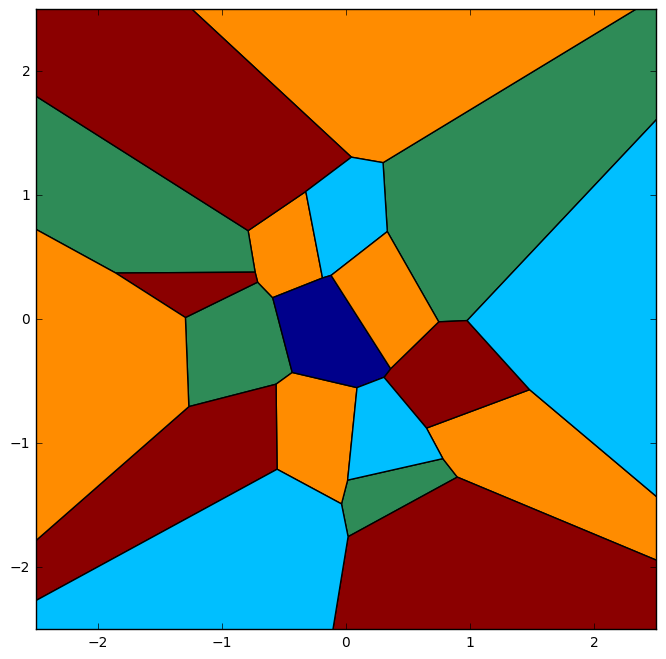

In [54]:
# Making a plot

plt.figure(figsize=(8,8))
plt.axis([-2.5,2.5,-2.5,2.5])
axes = plt.gca()
for i in newregion:
    verlist = []
    for j in i:
        ver = newvertex[j]
        verlist.append(ver) 
    reg = mplPath.Path(np.array(verlist))
    for k in range(0, len(X)):
        # Check whether our original coordinate is within a polygon, if yes, give it the same color
        if reg.contains_point((X[k])):
            axes.add_patch(Polygon(np.array(verlist), closed=True, facecolor=coloring[k]))


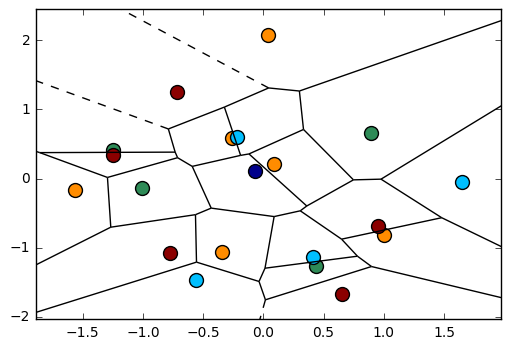

In [55]:
# The original plot

fig, ax = plt.subplots()

vor = Voronoi(X)

voronoi_plot_2d(vor, ax=ax, show_points=False, show_vertices=False)
for i, c in coloring.items():
    ax.scatter(X[i, 0], X[i, 1], c=c, s=100)